<a href="https://colab.research.google.com/github/NoahDPJ03/EM/blob/main/EMMC_JN_(UPDATED_8_14_25)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Expectation Maximization: Responsibility method and Monte Carlo Markov Chain Method**

Expectation Maximization (EM) is an algorithm designed for finding the mixes of a certain dataset. A mixed dataset means that data points can cmoe from different distributions. For EM to work, we need to know two things about the data:

1. How many distributions are associated with the dat
2. What those distributions are

For example, say we have a dataset call $H$ that is mixed with a Normal, Exponential, and Uniform distribution. We would need to know that there are 3 distributions and that those distributions are a Normal, Exponential, and a Uniform.

There are multiple steps to this algorithm work, in which I will explain each one:

1. Initialization, we set each mixture component weight, called $\pi_j$ for distribution $j$ to a value $\in [0,1]$ such that all the mixture components added together $= 1$ (so basically a probability distribution of distributions). We also set initial parameters for all the distributions.

2. We repeat the following steps until we reach convergence or we have reached the number of iterations desired

3. The E-step: We use what we know about the data points, the weights of the distributions, and the pdf's associated with each distributions to give us probabililies that a data point came from a particular distribution, or the number of samples from a particular distribution run

4. The M-step: We update the mixing weights by averaging the probabilities that a data point come from a particular distribution over all data points for each component.

5. We check for convergence or if we reached number of iterations.

There are two strategies in doing Expectation Maximization, and my goal is to analyze each strategy and to look at the pros and cons of each.

I will start by explaining the first method which if by computing responsibilities (Normal Method of EM). Responsibilities are the probabililies that a data point came from a particular distribution. I didn't want to say this at the start because the other strategy doesn't use responsibilities, so I thought it would confuse some.

The difference between the strategies is how they change in the E-step and M-step. For the normal method, once we have initialized everything, our E-step goes as follows:
Compute:

$$
\gamma_{ij} = P(z_i = j \mid x_i, \theta) = \frac{\pi_j \cdot f_j(x_i)}{\sum_k \pi_k \cdot f_k(x_i)}
$$

 for all combinations or a data point and distribution

Where $\gamma_{ij}$ is the responsibility or probability that data point $x_i$ came from the distribution $j$.

We then do the M-step for Normal EM, which is:

Update the mixture weights by taking the average over all responsibilities associated with mixture $j$, or:

$$
\pi_j = \frac{1}{n} \sum_{i=1}^{n} \gamma_{ij} \quad
$$

For an intuitional sense, imagine that we acquire a responsibility super high associated with a data point and distribution (which likely means that the pdf value at the data point was high with respect to the others). This means that the probability the x_i is associated with that distribution is high. Since this is true, it would increase our mixture amount because we have a data point that is extremely "connected" to that certain distribution.

The next method is the point in which this project came to fruition in the first place.

The Expection Maximization Monte Carlo Method

This is supposed to approximate the responsibility, or normal EM. The reason why someone may do such a method is because the calculations for the responsibilities may be hard to compute.

You approximate the responsibilites by sampling in Monte Carlo style: for all the data points, make a Monte Carlo Markov Chain over for however many iterations, and basing our decision to go to a different node, or more specifically, making an educated guess on what distribution this data point comes from by using the acceptance ratio:
$$
\alpha = \min\left(1, \frac{\pi_{z_{\text{new}}} \cdot f_{z_{\text{new}}}(x)}{\pi_{z} \cdot f_{z}(x)} \right)
$$
What this becomes are samples of each data point, and for our M-step we look at all the different samples, and compute:

$$
 \pi_j = \frac{\text{number of samples where we get distribution $j$} }{\text{total number of samples}}
$$

Methods

For my methods in analyzing these two methods, I will first start by implementing them into python and give a couple miniature examples of a mixed dataset and see how these methods favor. I will produce my own dataset to which I know all the true information of: The mixing weights, parameters, distributions, etc. and compare that as well to the results that both methods got.

Later on, we will create a random mixing distribution sampler where it creates mixes of distribution sizing from 2 to 8 mixes. The parameters will all be random in a certain predetermined interval for each.

To start, we must implement each Method, to which I have done so here:

The first I did was the MCMC method...

How many distributions would you like to mix? 3
Choose distribution 1: Normal
Enter the mean guess: 5
Enter the standard deviation guess: 6
Choose distribution 2: Normal
Enter the mean guess: 1
Enter the standard deviation guess: 3
Choose distribution 3: Normal
Enter the mean guess: 5
Enter the standard deviation guess: 6
Component 0: Normal, count = 7472
Component 1: Normal, count = 15093
Component 2: Normal, count = 7435

Component 0: Normal, count = 7473
Component 1: Normal, count = 15105
Component 2: Normal, count = 7422

Iteration 2: Log-likelihood = -478.05164292949183
Component 0: Normal, count = 7472
Component 1: Normal, count = 15083
Component 2: Normal, count = 7445

Iteration 3: Log-likelihood = -476.2476784648948
Component 0: Normal, count = 7461
Component 1: Normal, count = 15248
Component 2: Normal, count = 7291

Iteration 4: Log-likelihood = -474.12014879848317
Component 0: Normal, count = 7407
Component 1: Normal, count = 15349
Component 2: Normal, count = 7244

Iterati

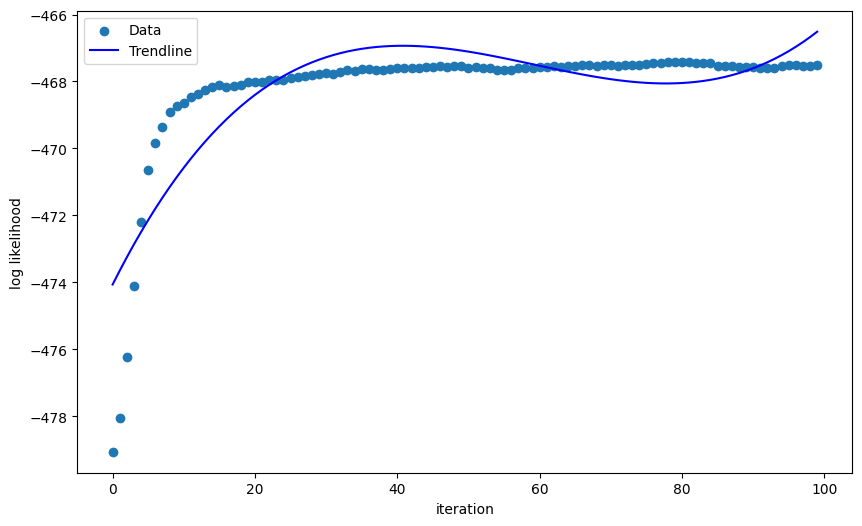

Final parameters:
Component 1: Normal
Parameters: 3.06140719486068 1.2051254631527415
Weight: 0.17210000001612333

Component 2: Normal
Parameters: 1.4752597491207786 0.7941915261404384
Weight: 0.6501666666349833

Component 3: Normal
Parameters: 2.818394639010778 1.279329463650946
Weight: 0.17773333334889335



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import functools

#EM MCl#########################################################################
################################################################################
################################################################################
################################################################################
################################################################################

def pick_distribution(answer):

  if answer == "Uniform":
    while True:
      try:
        a0 = float(input("Initial lower bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        b0 = float(input("Initial upper bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x):
      return 1 / (b0 - a0) if a0 <= x <= b0 else 0

    return pdf, (a0, b0)

  if answer == "Exponential":
    while True:
      try:
        theta0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

    def pdf(x):
      return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0

    return pdf, (theta0,) # Corrected parameter return

  if answer == "Normal":
    while True:
      try:
        mu0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        sigma0 = float(input("Enter the standard deviation guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x_val):
      return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
    return pdf, (mu0, sigma0)

  if answer == "Bernoulli":
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("p must be between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    def pdf(x):
        return p if x == 1 else (1 - p) if x == 0 else 0

    return pdf, (p,)

  if answer == "Poisson":

    integer_data = [x for x in data if float(x).is_integer()]
    estimated_lambda = np.mean(integer_data) if integer_data else 3.0

    print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
    while True:
        try:
            lambda_val = float(input("Enter the Poisson mean (lambda): "))
            if lambda_val > 0:
                break
            else:
                print("lambda must be greater than 0.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    def pdf(x):
      if x >= 0 and float(x).is_integer():
          return (math.exp(-lambda_val) * (lambda_val ** x)) / math.factorial(int(x)) # Corrected condition and factorial input
      else:
          return 0

    return pdf, (lambda_val,)


  # More distributions TBC

def e_step_MCMC(data, components, steps = 100):
  n = len(data)
  k = len(components)

  z_samples = []

  for i in range(n):
    x = data[i]

    z = np.random.choice(k)

    chain = []

    for t in range(steps):
      if k > 1: # Add check for k > 1
        z_new = np.random.choice([j for j in range(k) if j != z])

        if components[z_new]["distr name"] == "Poisson" and not float(x).is_integer():
          continue
        if components[z_new]["distr name"] == "Bernoulli" and not float(x).is_integer():
          continue

        num = components[z_new]["pi"] * components[z_new]["pdf"](x) # Score function which will idealize the data point with a certain distribution if the associated pi and pdf value
        den = components[z]["pi"] * components[z]["pdf"](x)         # with the data point is more than that of the previous

        alpha = min(1, num / den if den > 0 else 1)

        if np.random.rand() < alpha:
          z = z_new

      chain.append(z)

    z_samples.append(chain)

  return z_samples

def m_step_MCMC(z_samples, components):

  n = len(data)
  k = len(components)

  flatz = [z for chain in z_samples for z in chain]

  total = len(flatz)

  eps = 1e-6
  min_weight = 0.05

  for i in range(k):
    count_i = flatz.count(i)
    pi_i = (count_i + eps) / (total)
    components[i]["pi"] =  max(min_weight, pi_i)  # Updates pi / how much each distribution is mixed with how many exposures we got of the the specific distribution for all the data samples / total
                                                 # we give (count_i + e-6) for the case when our samples got us no cases when the data point was associated with pi_i distribution. This would make it so
                                                    # that theres no chance for the distribution to be revived no matter the pdf we get exposed to in the e step.

  new_total = sum(comp["pi"] for comp in components)

  for i in range(k):
    components[i]["pi"] /= new_total # normalizing because of min_weight

  return components

def update_params_pdfs(data, components, z_samples):
  k = len(components)
  n = len(data)

  flat_x = [x for i, x in enumerate(data) for j in range(len(z_samples[i]))]
  flat_z = [z for chain in z_samples for z in chain]

  for i in range(len(components)):
      print(f"Component {i}: {components[i]['distr name']}, count = {flat_z.count(i)}")

  print()

  for i in range(k):

    spec_data  = [x for x, z in zip(flat_x, flat_z) if z == i] # filters data points into what distribution we think the data points are associated with

    if components[i]["distr name"] == "Uniform":
      if spec_data: # Add check for empty list
        components[i]["params"] = (min(spec_data), max(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Exponential":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Normal":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data), np.std(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Bernoulli":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Poisson":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

  for comp in components:
      name = comp["distr name"]
      params = comp["params"]

      if name == "Normal":
        if len(spec_data) > 5:
          mu, sigma = params
          def f(x, mu=mu, sigma=sigma):
              return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
          comp["pdf"] = f
      elif name == "Poisson":
          lamb = params[0]
          def f(x, lamb=lamb):
              if x >= 0 and float(x).is_integer():
                  return (math.exp(-lamb) * (lamb ** x)) / math.factorial(int(x))
              else:
                  return 0
          comp["pdf"] = f
      elif name == "Exponential":
          theta = params[0]
          def f(x, theta=theta):
              return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
          comp["pdf"] = f
      elif name == "Uniform":
          a, b = params
          def f(x, a=a, b=b):
              return 1 / (b - a) if a <= x <= b else 0
          comp["pdf"] = f
      elif name == "Bernoulli":
          p = params[0]
          def f(x, p=p):
              return p if x == 1 else (1 - p) if x == 0 else 0
          comp["pdf"] = f
      else:
          raise ValueError(f"Unknown distribution name: {name}")

  return components

def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mixture_prob = sum(comp['pi'] * comp['pdf'](x) for comp in components)
        if mixture_prob > 0:
            log_likelihood += np.log(mixture_prob)
    return log_likelihood


def EM_MCMC(data, num_iters):

  components = []

  # data = [0, 1, 8, 6, 2, 4] # Removed hardcoded data

  num_components = int(input("How many distributions would you like to mix? "))

  components = []
  for i in range(num_components):
    distr = ''
    while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli"]:
      distr = input(f"Choose distribution {i+1}: ")
    pdf_f, param = pick_distribution(distr)
    components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components}) # --> Start by assuming that each data point has equal
                                                                                                          # chance of being associated with one of the distributions.
  ll_list = []
  for i in range(num_iters):
    z_samples = e_step_MCMC(data, components) #
    components = m_step_MCMC(z_samples, components)
    components = update_params_pdfs(data, components, z_samples)

    ll = compute_log_likelihood(data, components)
    ll_list.append(ll)
    if i > 0:
      print(f"Iteration {i+1}: Log-likelihood = {ll}")

  # plot log likelihood changes
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(ll_list)), ll_list, label='Data')

  coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly1d(coeffs)

  plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')

  plt.xlabel("iteration")
  plt.ylabel("log likelihood")
  plt.legend()
  plt.show()

  print("Final parameters:")

  for i in range(len(components)):
    print(f"Component {i+1}: {components[i]['distr name']}")
    print("Parameters:", *(float(x) for x in components[i]['params']))
    print(f"Weight: {float(components[i]['pi'])}")
    print()
  return

np.random.seed(924)

# Generate data
n = 300
data = []

# 40% Normal(2, 0.5)
data += list(np.random.normal(loc=2, scale=0.5, size=int(0.4 * n)))

# 30% Uniform(0,5)
data += list(np.random.uniform(0,5, size=int(0.3 * n)))

# 30% Exponential(1.5)
data += list(np.random.exponential(scale=1.5, size=int(0.3 * n)))

# Optional: Shuffle the data
random.shuffle(data)


EM_MCMC(data, 100)

This is a user input based code, where the user may pick the amount of mixes, distribution types, and parameters.

I will focus on two functions implemented here:

- e_step_MCMC: This step iterates between each data point, makes a list of our current weight mix times the pdf at data point value, sums it up to then on make probability weight for our initial z value. It then goes to iterate over the num steps we decided by look at a random z, checking it $\alpha$, and making a random decision to go to that z, and add it to the list.

- m_step_MCMC: This step flattens our list of lists (or changes seperate samples into one big sample). For each component, is counts the amount of sample points we got, and divides by total. Whats important here is the inclusion of the min_weight, which tells us that no matter what no mixed weight will be below 0.05. This can obviously cause problems for higher mixes, but if we didn't have some minimum value here we could possibly get a mixing weight of 0. This would in turn totally close off the distribution being a possibility for the next sample. This is normalized then after.


The second I did was the normal...

How many distributions would you like to mix? 3
Choose distribution 1: Normal
Enter the mean guess: 2
Enter the standard deviation guess: 3
Choose distribution 2: Normal
Enter the mean guess: 3
Enter the standard deviation guess: 5
Choose distribution 3: Normal
Enter the mean guess: 1
Enter the standard deviation guess: 
Invalid input. Please enter a number.
Enter the standard deviation guess: 3
Component 0: Normal, count = 11740
Component 1: Normal, count = 7231
Component 2: Normal, count = 11029

Component 0: Normal, count = 11755
Component 1: Normal, count = 7163
Component 2: Normal, count = 11082

Iteration 2: Log-likelihood = -479.2101814885265
Component 0: Normal, count = 11783
Component 1: Normal, count = 7061
Component 2: Normal, count = 11156

Iteration 3: Log-likelihood = -478.00616366101605
Component 0: Normal, count = 11780
Component 1: Normal, count = 7026
Component 2: Normal, count = 11194

Iteration 4: Log-likelihood = -476.2400634771803
Component 0: Normal, count = 1152

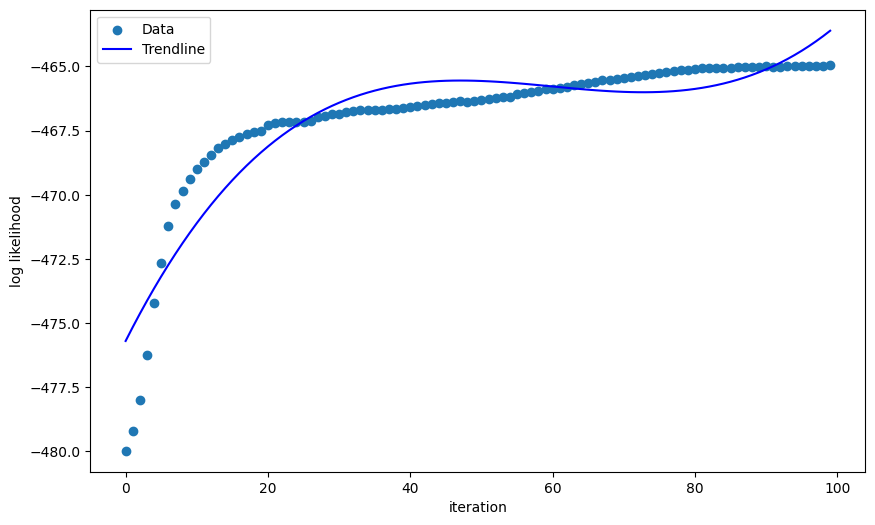

Final parameters:
Component 1: Normal
Parameters: 1.949378465395374 0.9078222576650615
Weight: 0.42446666665755334

Component 2: Normal
Parameters: 4.269695114192711 0.6182401989632673
Weight: 0.11453333335521332

Component 3: Normal
Parameters: 1.454418595673254 0.8343874902808952
Weight: 0.46099999998723334



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import functools

#Normal#########################################################################
################################################################################
################################################################################
################################################################################
################################################################################
def pick_distribution(answer):

  if answer == "Uniform":
    while True:
      try:
        a0 = float(input("Initial lower bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        b0 = float(input("Initial upper bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x):
      return 1 / (b0 - a0) if a0 <= x <= b0 else 0

    return pdf, (a0, b0)

  if answer == "Exponential":
    while True:
      try:
        theta0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

    def pdf(x):
      return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0

    return pdf, (theta0,) # Corrected parameter return

  if answer == "Normal":
    while True:
      try:
        mu0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        sigma0 = float(input("Enter the standard deviation guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x_val):
      return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
    return pdf, (mu0, sigma0)

  if answer == "Bernoulli":
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("p must be between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    def pdf(x):
        return p if x == 1 else (1 - p) if x == 0 else 0

    return pdf, (p,)

  if answer == "Poisson":

    integer_data = [x for x in data if float(x).is_integer()]
    estimated_lambda = np.mean(integer_data) if integer_data else 3.0

    print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
    while True:
        try:
            lambda_val = float(input("Enter the Poisson mean (lambda): "))
            if lambda_val > 0:
                break
            else:
                print("lambda must be greater than 0.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    def pdf(x):
      if x >= 0 and float(x).is_integer():
          return (math.exp(-lambda_val) * (lambda_val ** x)) / math.factorial(int(x)) # Corrected condition and factorial input
      else:
          return 0

    return pdf, (lambda_val,)


  # More distributions TBC

#-------------------------------------------------------------------------------

def e_step(data, components):
  responsibilities = []
  for x in data:
    num = [comp["pi"] * comp["pdf"](x) for comp in components]
    tot = sum(num)
    if tot == 0:
      probs = [1 / len(components)] * len(components)
    else:
      probs = [n / tot for n in num]
    responsibilities.append(probs)
  return responsibilities

def m_step(data, responsibilities, components):
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        components[i]["pi"] = total_r / n if total_r > 0 else 1e-6

        spec_data = [x * r for x, r in zip(data, r_i)]

        if components[i]["distr name"] == "Uniform":
            # Weighted min/max
            weights = np.array(r_i)
            if np.sum(weights) > 0:
                x_array = np.array(data)
                components[i]["params"] = (np.min(x_array[weights > 0]), np.max(x_array[weights > 0]))
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Exponential":
            if total_r > 0:
                theta = sum(spec_data) / total_r
                components[i]["params"] = (theta,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Normal":
            if total_r > 0:
                mu = sum(spec_data) / total_r
                var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / total_r
                sigma = math.sqrt(var)
                components[i]["params"] = (mu, sigma)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Bernoulli":
            if total_r > 0:
                p = sum(spec_data) / total_r
                components[i]["params"] = (p,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Poisson":
            if total_r > 0:
                lambda_ = sum(spec_data) / total_r
                components[i]["params"] = (lambda_,)
            else:
                pass # Keep previous parameters if no data points assigned to this component


    update_pdfs(components)
    return components

def update_pdfs(components):
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            def f(x, mu=mu, sigma=sigma):
                return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
            comp["pdf"] = f

        elif name == "Poisson":
            lamb = params[0]
            def f(x, lamb=lamb):
                if x >= 0 and float(x).is_integer():
                    return (math.exp(-lamb) * (lamb ** x)) / math.factorial(int(x))
                else:
                    return 0
            comp["pdf"] = f

        elif name == "Exponential":
            theta = params[0]
            def f(x, theta=theta):
                return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
            comp["pdf"] = f

        elif name == "Uniform":
            a, b = params
            def f(x, a=a, b=b):
                return 1 / (b - a) if a <= x <= b else 0
            comp["pdf"] = f

        elif name == "Bernoulli":
            p = params[0]
            def f(x, p=p):
                return p if x == 1 else (1 - p) if x == 0 else 0
            comp["pdf"] = f

        else:
            raise ValueError(f"Unknown distribution name: {name}")

#-------------------------------------------------------------------------------
def update_params_pdfs(data, components, z_samples):
  k = len(components)
  n = len(data)

  flat_x = [x for i, x in enumerate(data) for j in range(len(z_samples[i]))]
  flat_z = [z for chain in z_samples for z in chain]

  for i in range(len(components)):
      print(f"Component {i}: {components[i]['distr name']}, count = {flat_z.count(i)}")

  print()

  for i in range(k):

    spec_data  = [x for x, z in zip(flat_x, flat_z) if z == i] # filters data points into what distribution we think the data points are associated with

    if components[i]["distr name"] == "Uniform":
      if spec_data: # Add check for empty list
        components[i]["params"] = (min(spec_data), max(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Exponential":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Normal":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data), np.std(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Bernoulli":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Poisson":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

  for comp in components:
      name = comp["distr name"]
      params = comp["params"]

      if name == "Normal":
        if len(spec_data) > 5:
          mu, sigma = params
          def f(x, mu=mu, sigma=sigma):
              return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
          comp["pdf"] = f
      elif name == "Poisson":
          lamb = params[0]
          def f(x, lamb=lamb):
              if x >= 0 and float(x).is_integer():
                  return (math.exp(-lamb) * (lamb ** x)) / math.factorial(int(x))
              else:
                  return 0
          comp["pdf"] = f
      elif name == "Exponential":
          theta = params[0]
          def f(x, theta=theta):
              return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
          comp["pdf"] = f
      elif name == "Uniform":
          a, b = params
          def f(x, a=a, b=b):
              return 1 / (b - a) if a <= x <= b else 0
          comp["pdf"] = f
      elif name == "Bernoulli":
          p = params[0]
          def f(x, p=p):
              return p if x == 1 else (1 - p) if x == 0 else 0
          comp["pdf"] = f
      else:
          raise ValueError(f"Unknown distribution name: {name}")

  return components

def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mixture_prob = sum(comp['pi'] * comp['pdf'](x) for comp in components)
        if mixture_prob > 0:
            log_likelihood += np.log(mixture_prob)
    return log_likelihood


def EM_MCMC(data, num_iters):

  components = []

  # data = [0, 1, 8, 6, 2, 4] # Removed hardcoded data

  num_components = int(input("How many distributions would you like to mix? "))

  components = []
  for i in range(num_components):
    distr = ''
    while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli"]:
      distr = input(f"Choose distribution {i+1}: ")
    pdf_f, param = pick_distribution(distr)
    components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components}) # --> Start by assuming that each data point has equal
                                                                                                          # chance of being associated with one of the distributions.
  ll_list = []
  for i in range(num_iters):
    z_samples = e_step_MCMC(data, components) #
    components = m_step_MCMC(z_samples, components)
    components = update_params_pdfs(data, components, z_samples)

    ll = compute_log_likelihood(data, components)
    ll_list.append(ll)
    if i > 0:
      print(f"Iteration {i+1}: Log-likelihood = {ll}")

  # plot log likelihood changes
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(ll_list)), ll_list, label='Data')

  coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly1d(coeffs)

  plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')

  plt.xlabel("iteration")
  plt.ylabel("log likelihood")
  plt.legend()
  plt.show()

  print("Final parameters:")

  for i in range(len(components)):
    print(f"Component {i+1}: {components[i]['distr name']}")
    print("Parameters:", *(float(x) for x in components[i]['params']))
    print(f"Weight: {float(components[i]['pi'])}")
    print()
  return

np.random.seed(924)

# Generate data
n = 300
data = []

# 40% Normal(2, 0.5)
data += list(np.random.normal(loc=2, scale=0.5, size=int(0.4 * n)))

# 30% Uniform(0,5)
data += list(np.random.uniform(0,5, size=int(0.3 * n)))

# 30% Exponential(1.5)
data += list(np.random.exponential(scale=1.5, size=int(0.3 * n)))

# Optional: Shuffle the data
random.shuffle(data)


EM_MCMC(data, 100)

This code goes off of how the Normal EM is a simple plug and chug method (which also makes it easier on the computer).

I will analyze two functions again:

- e_step: This creates us a list of responsibilities, where each row corresponds to a data point and each column is a distribution.

- m_step: Updates by using the forumla which is the average of responsibilities for all data points. Also updates the parameters makes a utilizes the update_pdfs function which the MCMC EM didn't do.

After implementing, we now analyze certain data set that we already know the mixes, distributions, and parameters to. This dataset is is 40% normal, 30%  uniform and 30% Exponential. This gave us



Normal EM:

Final parameters:
--Component 1: Normal
--Parameters: 1.8423191947752293 0.5628494357388811
--Weight: 0.4654666666534534

--Component 2: Uniform
--Parameters: 2.001249637992631 4.939563309234937
--Weight: 0.20136666667986333

--Component 3: Exponential
--Parameters: 1.2616382356757725
--Weight: 0.3331666666666833

EMMC:

Final parameters:
--Component 1: Normal
--Parameters: 1.8460064463447392 0.5583405533495043
--Weight: 0.46846666665315334

--Component 2: Uniform
--Parameters: 2.001249637992631 4.939563309234937
--Weight: 0.20186666667981334

--Component 3: Exponential
--Parameters: 1.2533636181134291
--Weight: 0.3296666666670333

These values seem to be very closely related, showing that these 2 strategies are almost equivalent

I tested with a mix of Continuous and Discrete distributions as well, and a common theme of it was that the continuous distributions dominated. I think this is possibly due to the fact that continuous distributions can take on values that discrete can, but the inverse is not true.

To further my investigation, I created a mixing function which aloowed to create random mixes of different distributions. This code allowed to no user input and purely off computer randomness.

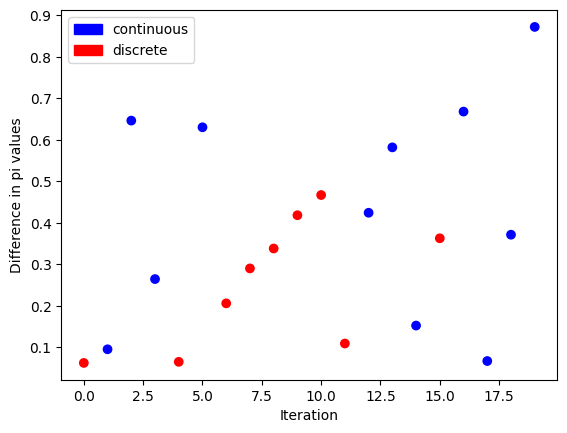

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from itertools import permutations

#---------------- Distribution Picker ----------------#
def pick_distribution(answer):
    """
    Automatically assigns parameters and returns (pdf, param_tuple)
    based on the chosen distribution name.
    """

    if answer == "Uniform":
        a0 = random.randint(0, 5)
        b0 = random.randint(a0 + 1, a0 + 8)  # ensure b > a
        def pdf(x): return 1 / (b0 - a0) if a0 <= x <= b0 else 0
        return pdf, (a0, b0)

    if answer == "Exponential":
        theta0 = random.uniform(0.5, 5.0)
        def pdf(x): return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0
        return pdf, (theta0,)

    if answer == "Normal":
        mu0 = random.uniform(-5, 5)
        sigma0 = random.uniform(0.5, 3.0)
        def pdf(x): return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x - mu0)**2 / (2 * sigma0**2))
        return pdf, (mu0, sigma0)

    if answer == "Poisson":
        lambda_val = random.uniform(1, 8)
        def pdf(x):
            if x >= 0 and float(x).is_integer():
                x_int = int(x)
                # Add epsilon to lambda_val to prevent math.log(0)
                log_pdf = -lambda_val + x_int * math.log(lambda_val + 1e-12) - math.lgamma(x_int + 1)
                return math.exp(log_pdf)
            return 0
        return pdf, (lambda_val,)

    if answer == "Bernoulli":
        p = random.uniform(0.1, 0.9)
        def pdf(x):
            # Add epsilon to p and (1-p) to prevent math.log(0)
            if x == 1: return p if p > 0 else 1e-12
            elif x == 0: return (1 - p) if (1 - p) > 0 else 1e-12
            else: return 0
        return pdf, (p,)

    raise ValueError(f"Unsupported distribution name: {answer}")

#########################################EM Normal###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################

#---------------- PDF Updater ----------------#
def update_pdfs(components):
    """
    After parameter updates, refresh each component's PDF.
    """
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            # Add epsilon to sigma to prevent division by zero
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma + 1e-12 * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * (sigma + 1e-12)**2))

        elif name == "Poisson":
            lamb = params[0]
            # Add epsilon to lamb to prevent math.log(0)
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb + 1e-12) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0

        elif name == "Exponential":
            theta = params[0]
            # Add epsilon to theta to prevent division by zero
            comp["pdf"] = lambda x, theta=theta: (1 / (theta + 1e-12)) * math.exp(-x / (theta + 1e-12)) if x >= 0 else 0

        elif name == "Uniform":
            a, b = params
            # Add epsilon to (b-a) to prevent division by zero
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a + 1e-12) if a <= x <= b else 0

        elif name == "Bernoulli":
            p = params[0]
            # Add epsilon to p and (1-p) to prevent math.log(0)
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0
        else:
            raise ValueError(f"Unknown distribution name: {name}")

#---------------- E-step ----------------#
def e_step(data, components):
    """
    Estimate responsibilities: P(z_i = j | x_i, θ)
    """
    responsibilities = []
    for x in data:
        weighted_probs = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weighted_probs)
        # Add epsilon to total to prevent division by zero or near zero
        probs = [wp / (total + 1e-12) for wp in weighted_probs] if total > 0 else [1 / len(components)] * len(components)
        responsibilities.append(probs)
    return responsibilities

#---------------- M-step ----------------#
def m_step(data, responsibilities, components):
    """
    Update weights and distribution parameters based on responsibilities.
    """
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        # Add epsilon to n to prevent division by zero or near zero
        components[i]["pi"] = total_r / (n + 1e-12) if total_r > 0 else 1e-12

        weighted_data = [x * r for x, r in zip(data, r_i)]

        name = components[i]["distr name"]

        if name == "Uniform":
            if np.sum(r_i) > 0:
                x_array = np.array(data)
                components[i]["params"] = (np.min(x_array), np.max(x_array))

        elif name == "Exponential" and total_r > 0:
            # Add epsilon to total_r to prevent division by zero or near zero
            theta = sum(weighted_data) / (total_r + 1e-12)
            components[i]["params"] = (max(theta, 1e-6),)

        elif name == "Normal" and total_r > 0:
            mu = sum(weighted_data) / (total_r + 1e-12)
            var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / (total_r + 1e-12)
            sigma = math.sqrt(max(var, 1e-12))
            components[i]["params"] = (mu, sigma)

        elif name == "Bernoulli" and total_r > 0:
            p = sum(weighted_data) / max(total_r, 1e-12)
            components[i]["params"] = (min(max(p, 1e-6), 1 - 1e-6),)

        elif name == "Poisson" and total_r > 0:
            lambda_ = sum(weighted_data) / max(total_r, 1e-12)
            components[i]["params"] = (max(lambda_, 1e-6),)
    update_pdfs(components)
    return components
#########################################EM MC###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################

#---------------- E-Step (MCMC) ----------------#
def e_step_MCMC(data, components, steps=300):
    z_samples = []
    k = len(components)
    for x in data:
        weighted_probs = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weighted_probs)
        # Add epsilon to total to prevent division by zero or near zero
        weights = [w / (total + 1e-12) for w in weighted_probs] if total > 0 else [1 / k] * k

        # Explicitly re-normalize weights to sum to 1
        weights_sum = sum(weights)
        if weights_sum > 0:
            weights = [w / weights_sum for w in weights]
        else:
            weights = [1 / k] * k # Fallback to equal weights if sum is zero

        z = np.random.choice(range(k), p=weights)
        chain = []
        for _ in range(steps):
            if k > 1:
                z_new = np.random.choice([j for j in range(k) if j != z])
                if components[z_new]["distr name"] in {"Poisson", "Bernoulli", "Binomial"} and not float(x).is_integer():
                    chain.append(z)
                    continue
                num = components[z_new]["pi"] * components[z_new]["pdf"](x)
                den = components[z]["pi"] * components[z]["pdf"](x)
                # Add epsilon to den to prevent division by zero or near zero
                alpha = min(1, num / (den + 1e-12) if den > 0 else 1)
                if np.random.rand() < alpha:
                    z = z_new
            chain.append(z)
        z_samples.append(chain)
    return z_samples


#---------------- M-Step ----------------#
def m_step_MCMC(z_samples, components):
    flatz = [z for chain in z_samples for z in chain]
    total = len(flatz)
    eps = 1e-6
    min_weight = 0.05
    for i in range(len(components)):
        count_i = flatz.count(i)
        # Add epsilon to total to prevent division by zero or near zero
        pi_i = (count_i + eps) / (total + 1e-12)
        components[i]["pi"] = max(min_weight, pi_i)
    total_pi = sum(comp["pi"] for comp in components)
    # Add epsilon to total_pi to prevent division by zero or near zero
    for comp in components:
        comp["pi"] /= (total_pi + 1e-12)
    return components


#---------------- Update Parameters ----------------#
def update_params_pdfs(data, components, z_samples):
    flat_x = [x for i, x in enumerate(data) for _ in z_samples[i]]
    flat_z = [z for chain in z_samples for z in chain]
    for i, comp in enumerate(components):
        spec_data = [x for x, z in zip(flat_x, flat_z) if z == i]
        if not spec_data:
            continue
        name = comp["distr name"]
        if name == "Uniform":
            comp["params"] = (min(spec_data), max(spec_data))
        elif name == "Exponential":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Normal":
            # Add epsilon to np.std to prevent zero standard deviation
            comp["params"] = (np.mean(spec_data), np.std(spec_data) + 1e-12)
        elif name == "Bernoulli":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Poisson":
            comp["params"] = (np.mean(spec_data),)

        # Update pdfs
        params = comp["params"]
        if name == "Normal":
            mu, sigma = params
            # Add epsilon to sigma to prevent division by zero
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma + 1e-12 * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * (sigma + 1e-12)**2))
        elif name == "Poisson":
            lamb = params[0]
            # Add epsilon to lamb to prevent math.log(0)
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb + 1e-12) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0
        elif name == "Exponential":
            theta = params[0]
            # Add epsilon to theta to prevent division by zero
            comp["pdf"] = lambda x, theta=theta: (1 / (theta + 1e-12)) * math.exp(-x / (theta + 1e-12)) if x >= 0 else 0
        elif name == "Uniform":
            a, b = params
            # Add epsilon to (b-a) to prevent division by zero
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a + 1e-12) if a <= x <= b else 0
        elif name == "Bernoulli":
            p = params[0]
            # Add epsilon to p and (1-p) to prevent math.log(0)
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0
    return components

#---------------- EM-MCMC Main ----------------#
def EM_MCMC(data, true_comps, iter = 25):

    complen = len(true_comps)
    components = []
    for i in range(complen):
      distr = true_comps[i]["distr name"]
      pdf_f, param = pick_distribution(distr)
      components.append({
          "distr name": distr,
          "pdf": pdf_f,
          "params": param,
          "pi": 1/complen # we assume dont know the exact mix of the data
      })

    for i in range(iter):
        z_samples = e_step_MCMC(data, components)
        components = m_step_MCMC(z_samples, components)
        components = update_params_pdfs(data, components, z_samples)

    return [components[i]['pi'] for i in range(complen)]

#---------------- EM Main ----------------#
def EM(data, true_comps, iter = 25):

    num_components = len(true_comps)
    components = []
    for i in range(num_components):
        distr = true_comps[i]["distr name"]
        pdf_f, param = pick_distribution(distr)
        components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": 1 / num_components
        })

    for i in range(iter):
        responsibilities = e_step(data, components)
        components = m_step(data, responsibilities, components)

    return [components[i]['pi'] for i in range(num_components)]



import random as rd


def give_data_with_mixes_distribs_continuous():

  num_mixes = rd.randint(2, 8)

  distributions = ["Uniform", "Exponential", "Normal"]
  components = []

  true_components = []
  sum = 0
  for i in range(num_mixes):
        distr = rd.choice(distributions)
        pdf_f, param = pick_distribution(distr)
        pi_i = rd.uniform(0, 1 - sum)
        sum += pi_i
        true_components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": pi_i
        })
  # create data
  data = []
  n = rd.randint(5, 1000)
  for comp in true_components:
    if comp["distr name"] == "Uniform":
      data += list(np.random.uniform(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Exponential":
      data += list(np.random.exponential(comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Normal":
      data += list(np.random.normal(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
  return data, true_components
  ############################################

def give_data_with_mixes_distribs_discrete():

  num_mixes = rd.randint(2, 8)

  distributions = ["Poisson", "Bernoulli"]
  components = []

  true_components = []
  sum = 0
  for i in range(num_mixes):
        distr = rd.choice(distributions)
        pdf_f, param = pick_distribution(distr)
        pi_i = rd.uniform(0, 1 - sum)
        sum += pi_i
        true_components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": pi_i
        })
  # create data
  data = []
  n = rd.randint(5, 1000)
  for comp in true_components:
    if comp["distr name"] == "Poisson":
      data += list(np.random.poisson(comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Bernoulli":
      data += list(np.random.binomial(1, comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Binomial":
      data += list(np.random.binomial(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
  return data, true_components
  ############################################
def best_pi_match_distance(pi_a, pi_b):
    """
    Returns (min_L1, best_perm_pi_b).
    Tries all permutations of pi_b (OK up to K=8).
    """
    k = len(pi_a)
    best = None
    best_perm = None
    for perm in permutations(range(k)):
        perm_b = [pi_b[j] for j in perm]
        dist = sum(abs(a - b) for a, b in zip(pi_a, perm_b))
        if best is None or dist < best:
            best = dist
            best_perm = perm_b
    return best, best_perm

def do_test(iter = 10):

  num_test = 20

  difflistpi = []
  dis_notlist= []
  for i in range(num_test):
    decide = rd.randint(0, 1)
    dis_or_not = decide
    if decide == 0:
      data, true_components = give_data_with_mixes_distribs_continuous()

    if decide == 1:
      data, true_components = give_data_with_mixes_distribs_discrete()

    MCMC_pi = EM_MCMC(data, true_components, iter)
    EM_pi = EM(data, true_components, iter)

    L1, _ = best_pi_match_distance(EM_pi, MCMC_pi)
    difflistpi.append(L1)
    dis_notlist.append(dis_or_not)

  colors = ['blue' if dis_notlist[i] == 0 else 'red' for i in range(len(dis_notlist))]
  import matplotlib.patches as mpatches
  leg = [
      mpatches.Patch(color='blue', label='continuous'),
      mpatches.Patch(color='red', label='discrete')
  ]

  plt.scatter(range(len(difflistpi)), difflistpi, c=colors)
  plt.xlabel("Iteration")
  plt.ylabel("Difference in pi values")
  plt.legend(handles=leg)
  plt.show()

do_test()

This uses the fact that we know what distributions are being generated to our advantage. It also utilizes the random function for multiple decisions - if we are going discrete or if not (decided to seperate because of the experiment that happened earlier when combining the 2 together).

Chatgpt was used here for cleanup of the code in the previous segments, in which I had to argue for it to not do too much to the code.

The graph shows the absolute differences in our finished mixing weights for each mixing we randomly selected. We see that the differences are quite random, which is what we should expect - the graph doesn't serve much meaning, only for a look into seeing what is happening under the hood more.



From our brief analysid of these 2 method for Expectation Maximizimation, I've found that:

- The Monte Carlo method requires more computation and has higher complexity than that of the Normal EM.

- That being said, Monte Carlo gave surprisingly similar results, making it a viable alternative for EM.

AI USE:

MODEL(S): CHATGPT 4o
DATE: JULY 18TH-22ND
PROMPTS ENTERED:

- "computing MLE for a mixture of distributions from dat


- "what is this log likelihood telling us for this iteration"

- "why would the sum be 0 if the data fit perfected"


- "give me a good dataset to use this on"

- "this doesnt seem to give me accurate results"

- "lambda x, mu=mu, sigma=sigma:
what does this line mean"

- "are u talking about it being (count_i + 1e-6) / total? for 4."

- "is there possibly other problems in my code"

- "is there a trendline function for plt"

- "coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly(coeffs)
does this work"

- "Component 1: Poisson, count = 236

  Component 2: Exponential, count = 17088

  ...

  Final parameters:
  Component 1: Normal
  Parameters: 2.0323434577749007 0.5859832865135821
  Weight: 0.42520000003333336

  Component 2: Poisson
  Parameters: 5.834782608695652
  Weight: 0.0076666667

  Component 3: Exponential
  Parameters: 2.442350628306393
  Weight: 0.5671333333666667

  what can u say about this information and the problems with the mixtures"

- "how would I change my poission initialization"

- "Its better, but still seeing problems with poisson"

- "what is the formula for responsibilities"

- "If we have data that is from a binomial distribution that we don't know what p is, how can we estimate p"

- "how would we do update of params in binomial"

- "... Iteration 26: Log-likelihood = -1088.0312403030805
  Component 0: Poisson, count = 18000
  Component 1: Binomial, count = 12000

  Iteration 27: Log-likelihood = -1088.0312403030805
  Component 0: Poisson, count = 18000
  Component 1: Binomial, count = 12000

  Iteration 28: Log-likelihood = -1088.0312403030805
  Component 0: Poisson, count = 18000
  Component 1: Binomial, count = 12000

  Iteration 29: Log-likelihood = -1088.0312403030805
  Component 0: Poisson, count = 18000
  Component 1: Binomial, count = 12000

  Iteration 30: Log-likelihood = -1088.0312403030805

  why output do this"


- "clean up this code and make it look nice, and provide comments and help to all the functions"

- "u removed the try and except things in here, doesn't that cause issues if I pick something bad"

- "clean up this code and make it look nice, and provide comments and help to all the functions
I TOLD YOU NOT TO REMOVE ANYTHING AND YOU REMOVED THE TRY AND EXCEPT, KEEP IT IN AND STILL MAKE EVERYTHING LOOK PRETTY AND HAVE AA HELP FOR FUNCTIONS"

- "now comment on this code and clean it up"

- "convert this such that all the user inputs are done by the computer for a given answer"

- "how do classes work"

- "can you change the name of the functions such that none of them have the same name, u will also have to look through the code for old function name and change that "

- "am I missing anything, I want to make random samples of random mixes of either discrete or continuous mixes and then test the differences in pi with EM and EM MCMC ways"

- "What are all the steps associated in expectation maximization"

- "The M-step: We update the mixing weights by the average of the probability of data point $x$ coming from distribution $j$ for all $x$ in the data set.

  is this worded right?"

- "can u put this in Latex"

#Catalog/Backup

# Making Random Mixes and testing both EM and EMMC and comparing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
#---------------- Distribution Picker ----------------#
def pick_distribution(answer):
    """
    Automatically assigns parameters and returns (pdf, param_tuple)
    based on the chosen distribution name.
    """

    if answer == "Uniform":
        a0 = random.randint(0, 5)
        b0 = random.randint(a0 + 1, a0 + 8)  # ensure b > a
        def pdf(x): return 1 / (b0 - a0) if a0 <= x <= b0 else 0
        return pdf, (a0, b0)

    if answer == "Exponential":
        theta0 = random.uniform(0.5, 5.0)
        def pdf(x): return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0
        return pdf, (theta0,)

    if answer == "Normal":
        mu0 = random.uniform(-5, 5)
        sigma0 = random.uniform(0.5, 3.0)
        def pdf(x): return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x - mu0)**2 / (2 * sigma0**2))
        return pdf, (mu0, sigma0)

    if answer == "Poisson":
        lambda_val = random.uniform(1, 8)
        def pdf(x):
            if x >= 0 and float(x).is_integer():
                x_int = int(x)
                log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
                return math.exp(log_pdf)
            return 0
        return pdf, (lambda_val,)

    if answer == "Bernoulli":
        p = random.uniform(0.1, 0.9)
        def pdf(x): return p if x == 1 else (1 - p) if x == 0 else 0
        return pdf, (p,)

    raise ValueError(f"Unsupported distribution name: {answer}")

#########################################EM Normal###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################

#---------------- PDF Updater ----------------#
def update_pdfs(components):
    """
    After parameter updates, refresh each component's PDF.
    """
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))

        elif name == "Poisson":
            lamb = params[0]
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0

        elif name == "Exponential":
            theta = params[0]
            comp["pdf"] = lambda x, theta=theta: (1 / theta) * math.exp(-x / theta) if x >= 0 else 0

        elif name == "Uniform":
            a, b = params
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a) if a <= x <= b else 0

        elif name == "Bernoulli":
            p = params[0]
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0
        else:
            raise ValueError(f"Unknown distribution name: {name}")

#---------------- E-step ----------------#
def e_step(data, components):
    """
    Estimate responsibilities: P(z_i = j | x_i, θ)
    """
    responsibilities = []
    for x in data:
        weighted_probs = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weighted_probs)
        probs = [wp / total for wp in weighted_probs] if total > 0 else [1 / len(components)] * len(components)
        responsibilities.append(probs)
    return responsibilities

#---------------- M-step ----------------#
def m_step(data, responsibilities, components):
    """
    Update weights and distribution parameters based on responsibilities.
    """
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        components[i]["pi"] = total_r / n if total_r > 0 else 1e-6

        weighted_data = [x * r for x, r in zip(data, r_i)]

        name = components[i]["distr name"]

        if name == "Uniform":
            if np.sum(r_i) > 0:
                x_array = np.array(data)
                components[i]["params"] = (np.min(x_array), np.max(x_array))

        elif name == "Exponential" and total_r > 0:
            theta = sum(weighted_data) / total_r
            components[i]["params"] = (theta,)

        elif name == "Normal" and total_r > 0:
            mu = sum(weighted_data) / total_r
            var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / total_r
            sigma = math.sqrt(var)
            components[i]["params"] = (mu, sigma)

        elif name == "Bernoulli" and total_r > 0:
            p = sum(weighted_data) / total_r
            components[i]["params"] = (p,)

        elif name == "Poisson" and total_r > 0:
            lambda_ = sum(weighted_data) / total_r
            components[i]["params"] = (lambda_,)
    update_pdfs(components)
    return components
#########################################EM MC###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################

#---------------- E-Step (MCMC) ----------------#
def e_step_MCMC(data, components, steps=100):
    z_samples = []
    k = len(components)
    for x in data:
        weights = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weights)
        weights = [w / total for w in weights] if total > 0 else [1 / k] * k
        z = np.random.choice(range(k), p=weights)
        chain = []
        for _ in range(steps):
            if k > 1:
                z_new = np.random.choice([j for j in range(k) if j != z])
                if components[z_new]["distr name"] in {"Poisson", "Bernoulli"} and not float(x).is_integer():
                    chain.append(z)
                    continue
                num = components[z_new]["pi"] * components[z_new]["pdf"](x)
                den = components[z]["pi"] * components[z]["pdf"](x)
                alpha = min(1, num / den if den > 0 else 1)
                if np.random.rand() < alpha:
                    z = z_new
            chain.append(z)
        z_samples.append(chain)
    return z_samples


#---------------- M-Step ----------------#
def m_step_MCMC(z_samples, components):
    flatz = [z for chain in z_samples for z in chain]
    total = len(flatz)
    eps = 1e-6
    min_weight = 0.05
    for i in range(len(components)):
        count_i = flatz.count(i)
        pi_i = (count_i + eps) / total
        components[i]["pi"] = max(min_weight, pi_i)
    total_pi = sum(comp["pi"] for comp in components)
    for comp in components:
        comp["pi"] /= total_pi
    return components


#---------------- Update Parameters ----------------#
def update_params_pdfs(data, components, z_samples):
    flat_x = [x for i, x in enumerate(data) for _ in z_samples[i]]
    flat_z = [z for chain in z_samples for z in chain]
    for i, comp in enumerate(components):
        spec_data = [x for x, z in zip(flat_x, flat_z) if z == i]
        if not spec_data:
            continue
        name = comp["distr name"]
        if name == "Uniform":
            comp["params"] = (min(spec_data), max(spec_data))
        elif name == "Exponential":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Normal":
            comp["params"] = (np.mean(spec_data), np.std(spec_data))
        elif name == "Bernoulli":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Poisson":
            comp["params"] = (np.mean(spec_data),)

        # Update pdfs
        params = comp["params"]
        if name == "Normal":
            mu, sigma = params
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
        elif name == "Poisson":
            lamb = params[0]
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0
        elif name == "Exponential":
            theta = params[0]
            comp["pdf"] = lambda x, theta=theta: (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
        elif name == "Uniform":
            a, b = params
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a) if a <= x <= b else 0
        elif name == "Bernoulli":
            p = params[0]
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0
    return components

#---------------- EM-MCMC Main ----------------#
def EM_MCMC(data, true_comps, iter = 25):

    complen = len(true_comps)
    components = []
    for i in range(complen):
      distr = true_comps[i]["distr name"]
      pdf_f, param = pick_distribution(distr)
      components.append({
          "distr name": distr,
          "pdf": pdf_f,
          "params": param,
          "pi": 1/complen # we assume dont know the exact mix of the data
      })

    for i in range(iter):
        z_samples = e_step_MCMC(data, components)
        components = m_step_MCMC(z_samples, components)
        components = update_params_pdfs(data, components, z_samples)

    return [components[i]['pi'] for i in range(complen)]

#---------------- EM Main ----------------#
def EM(data, true_comps, iter = 25):

    num_components = len(true_comps)
    components = []
    for i in range(num_components):
        distr = true_comps[i]["distr name"]
        pdf_f, param = pick_distribution(distr)
        components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": 1 / num_components
        })

    for i in range(iter):
        responsibilities = e_step(data, components)
        components = m_step(data, responsibilities, components)

    return [components[i]['pi'] for i in range(num_components)]



import random as rd


def give_data_with_mixes_distribs_continuous():

  num_mixes = rd.randint(2, 8)

  distributions = ["Uniform", "Exponential", "Normal"]
  components = []

  true_components = []
  sum = 0
  for i in range(num_mixes):
        distr = rd.choice(distributions)
        pdf_f, param = pick_distribution(distr)
        pi_i = rd.uniform(0, 1 - sum)
        sum += pi_i
        true_components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": pi_i
        })
  # create data
  data = []
  n = rd.randint(5, 1000)
  for comp in true_components:
    if comp["distr name"] == "Uniform":
      data += list(np.random.uniform(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Exponential":
      data += list(np.random.exponential(comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Normal":
      data += list(np.random.normal(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
  return data, true_components
  ############################################

def give_data_with_mixes_distribs_discrete():

  num_mixes = rd.randint(2, 8)

  distributions = ["Poisson", "Bernoulli"]
  components = []

  true_components = []
  sum = 0
  for i in range(num_mixes):
        distr = rd.choice(distributions)
        pdf_f, param = pick_distribution(distr)
        pi_i = rd.uniform(0, 1 - sum)
        sum += pi_i
        true_components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": pi_i
        })
  # create data
  data = []
  n = rd.randint(5, 1000)
  for comp in true_components:
    if comp["distr name"] == "Poisson":
      data += list(np.random.poisson(comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Bernoulli":
      data += list(np.random.binomial(1, comp["params"][0], size=int(comp["pi"] * n)))
    if comp["distr name"] == "Binomial":
      data += list(np.random.binomial(comp["params"][0], comp["params"][1], size=int(comp["pi"] * n)))
  return data, true_components
  ############################################

def do_test(iter = 25):

  num_test = 20

  difflistpi = []
  for i in range(num_test):
    decide = rd.randint(0, 1)
    if decide == 0:
      data, true_components = give_data_with_mixes_distribs_continuous()
      MCMC_pi = EM_MCMC(data, true_components, iter)
      EM_pi = EM(data, true_components, iter)
    if decide == 1:
      data, true_components = give_data_with_mixes_distribs_discrete()
      MCMC_pi = EM_MCMC(data, true_components, iter)
      EM_pi = EM(data, true_components, iter)
    #differences in pi
    diff_pi = [abs(MCMC_pi[i] - EM_pi[i]) for i in range(len(MCMC_pi))]
    #list of differences
    difflistpi.append(sum(diff_pi))
    print([round(diff, 6) for diff in diff_pi])

  plt.scatter(range(len(difflistpi)), difflistpi, label='')
  plt.xlabel("Iteration")
  plt.ylabel("Difference in pi values")
  plt.legend()
  plt.show()

do_test()



# Using MCMC instead of Normal EM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

#########################################EM MC###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#---------------- Safe Binomial PDF ----------------#
def binomial_pdf_safe(x, n, p):
    """Computes binomial PMF using log-form to avoid overflow."""
    if 0 <= x <= n:
        try:
            log_pdf = (math.lgamma(n + 1)
                       - math.lgamma(x + 1)
                       - math.lgamma(n - x + 1)
                       + x * math.log(p)
                       + (n - x) * math.log(1 - p))
            return math.exp(log_pdf)
        except (ValueError, OverflowError):
            return 0
    return 0


#---------------- Distribution Picker ----------------#
def pick_distribution(answer):
    """
    Prompts user for parameters of the chosen distribution.
    Returns a tuple: (pdf function, parameter tuple)
    """

    if answer == "Uniform":
        while True:
            try:
                a0 = float(input("Initial lower bound guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        while True:
            try:
                b0 = float(input("Initial upper bound guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x): return 1 / (b0 - a0) if a0 <= x <= b0 else 0
        return pdf, (a0, b0)

    if answer == "Exponential":
        while True:
            try:
                theta0 = float(input("Enter the mean guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x): return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0
        return pdf, (theta0,)

    if answer == "Normal":
        while True:
            try:
                mu0 = float(input("Enter the mean guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        while True:
            try:
                sigma0 = float(input("Enter the standard deviation guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x): return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x - mu0)**2 / (2 * sigma0**2))
        return pdf, (mu0, sigma0)

    if answer == "Poisson":
        integer_data = [x for x in data if float(x).is_integer()]
        estimated_lambda = np.mean(integer_data) if integer_data else 3.0
        print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
        while True:
            try:
                lambda_val = float(input("Enter the Poisson mean (lambda): "))
                if lambda_val > 0:
                    break
                else:
                    print("Lambda must be greater than 0.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            if x >= 0 and float(x).is_integer():
                x_int = int(x)
                log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
                return math.exp(log_pdf)
            return 0
        return pdf, (lambda_val,)

    if answer == "Bernoulli":
        while True:
            try:
                p = float(input("Enter probability of success (0 < p < 1): "))
                if 0 < p < 1:
                    break
                else:
                    print("p must be between 0 and 1.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x): return p if x == 1 else (1 - p) if x == 0 else 0
        return pdf, (p,)

    if answer == "Binomial":
        n = 300  # Reasonable default
        while True:
            try:
                p = float(input("Enter probability of success (0 < p < 1): "))
                if 0 < p < 1:
                    break
                else:
                    print("p must be between 0 and 1.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x): return binomial_pdf_safe(x, n, p)
        return pdf, (n, p)


#---------------- E-Step (MCMC) ----------------#
def e_step_MCMC(data, components, steps=100):
    z_samples = []
    k = len(components)
    for x in data:
        weights = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weights)
        weights = [w / total for w in weights] if total > 0 else [1 / k] * k
        z = np.random.choice(range(k), p=weights)
        chain = []
        for _ in range(steps):
            if k > 1:
                z_new = np.random.choice([j for j in range(k) if j != z])
                if components[z_new]["distr name"] in {"Poisson", "Bernoulli", "Binomial"} and not float(x).is_integer():
                    chain.append(z)
                    continue
                num = components[z_new]["pi"] * components[z_new]["pdf"](x)
                den = components[z]["pi"] * components[z]["pdf"](x)
                alpha = min(1, num / den if den > 0 else 1)
                if np.random.rand() < alpha:
                    z = z_new
            chain.append(z)
        z_samples.append(chain)
    return z_samples


#---------------- M-Step ----------------#
def m_step_MCMC(z_samples, components):
    flatz = [z for chain in z_samples for z in chain]
    total = len(flatz)
    eps = 1e-6
    min_weight = 0.05
    for i in range(len(components)):
        count_i = flatz.count(i)
        pi_i = (count_i + eps) / total
        components[i]["pi"] = max(min_weight, pi_i)
    total_pi = sum(comp["pi"] for comp in components)
    for comp in components:
        comp["pi"] /= total_pi
    return components


#---------------- Update Parameters ----------------#
def update_params_pdfs(data, components, z_samples):
    flat_x = [x for i, x in enumerate(data) for _ in z_samples[i]]
    flat_z = [z for chain in z_samples for z in chain]
    for i, comp in enumerate(components):
        spec_data = [x for x, z in zip(flat_x, flat_z) if z == i]
        if not spec_data:
            continue
        name = comp["distr name"]
        if name == "Uniform":
            comp["params"] = (min(spec_data), max(spec_data))
        elif name == "Exponential":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Normal":
            comp["params"] = (np.mean(spec_data), np.std(spec_data))
        elif name == "Bernoulli":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Poisson":
            comp["params"] = (np.mean(spec_data),)
        elif name == "Binomial":
            n_old, _ = comp["params"]
            n = max(int(n_old), int(np.percentile(spec_data, 95)))
            p_est = np.mean(spec_data) / n if n > 0 else 1e-6
            p_est = max(1e-6, min(1 - 1e-6, p_est))
            comp["params"] = (n, p_est)

        # Update pdfs
        params = comp["params"]
        if name == "Normal":
            mu, sigma = params
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
        elif name == "Poisson":
            lamb = params[0]
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0
        elif name == "Exponential":
            theta = params[0]
            comp["pdf"] = lambda x, theta=theta: (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
        elif name == "Uniform":
            a, b = params
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a) if a <= x <= b else 0
        elif name == "Bernoulli":
            p = params[0]
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0
        elif name == "Binomial":
            n, p = params
            comp["pdf"] = lambda x, n=n, p=p: binomial_pdf_safe(x, n, p)
    return components


#---------------- Log-Likelihood ----------------#
def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mix_prob = sum(comp["pi"] * comp["pdf"](x) for comp in components)
        if mix_prob > 0:
            log_likelihood += math.log(mix_prob)
    return log_likelihood


#---------------- EM-MCMC Main ----------------#
def EM_MCMC(data, num_iters):
    num_components = int(input("How many distributions would you like to mix? "))
    components = []
    for i in range(num_components):
        distr = ""
        while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli", "Binomial"]:
            distr = input(f"Choose distribution {i+1}: ")
        pdf_f, param = pick_distribution(distr)
        components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components})

    ll_list = []
    for i in range(num_iters):
        z_samples = e_step_MCMC(data, components)
        components = m_step_MCMC(z_samples, components)
        components = update_params_pdfs(data, components, z_samples)
        ll = compute_log_likelihood(data, components)
        ll_list.append(ll)
        if i > 0:
            print(f"Iteration {i+1}: Log-likelihood = {ll:.4f}")

    # Plot log-likelihood
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(ll_list)), ll_list, label='Log-Likelihood')
    trendline = np.poly1d(np.polyfit(range(len(ll_list)), ll_list, deg=3))
    plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.legend()
    plt.show()

    # Final parameter output
    print("\nFinal Parameters:")
    for i, comp in enumerate(components):
        print(f"Component {i+1}: {comp['distr name']}")
        print("  Parameters:", *(round(float(x), 4) for x in comp["params"]))
        print("  Weight:    ", round(float(comp["pi"]), 4))
        print()


#---------------- Entry Point ----------------#
np.random.seed(924)
n = 300
data = []
data += list(np.random.poisson(3, size=int(0.4 * n)))
data += list(np.random.binomial(300, 0.5, size=int(0.6 * n)))
random.shuffle(data)

# Run
EM_MCMC(data, 20)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

#########################################EM Normal###############################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#################################################################################################
#---------------- Distribution Picker ----------------#
def pick_distribution(answer):
    """
    Asks the user for parameters depending on the distribution type.
    Returns a PDF function and its initial parameters.
    """

    # Continuous Distributions ----------------------------

    if answer == "Uniform":
        while True:
            try:
                a0 = float(input("Initial lower bound guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        while True:
            try:
                b0 = float(input("Initial upper bound guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            return 1 / (b0 - a0) if a0 <= x <= b0 else 0
        return pdf, (a0, b0)

    if answer == "Exponential":
        while True:
            try:
                theta0 = float(input("Enter the mean guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0
        return pdf, (theta0,)

    if answer == "Normal":
        while True:
            try:
                mu0 = float(input("Enter the mean guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        while True:
            try:
                sigma0 = float(input("Enter the standard deviation guess: "))
                break
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x_val):
            return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
        return pdf, (mu0, sigma0)

    # Discrete Distributions ----------------------------

    if answer == "Poisson":
        integer_data = [x for x in data if float(x).is_integer()]
        estimated_lambda = np.mean(integer_data) if integer_data else 3.0
        print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
        while True:
            try:
                lambda_val = float(input("Enter the Poisson mean (lambda): "))
                if lambda_val > 0:
                    break
                else:
                    print("lambda must be greater than 0.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            if x >= 0 and float(x).is_integer():
                x_int = int(x)
                log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
                return math.exp(log_pdf)
            return 0
        return pdf, (lambda_val,)

    if answer == "Bernoulli":
        while True:
            try:
                p = float(input("Enter probability of success (0 < p < 1): "))
                if 0 < p < 1:
                    break
                else:
                    print("p must be between 0 and 1.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            return p if x == 1 else (1 - p) if x == 0 else 0
        return pdf, (p,)

    if answer == "Binomial":
        n = max(data)
        while True:
            try:
                p = float(input("Enter probability of success (0 < p < 1): "))
                if 0 < p < 1:
                    break
                else:
                    print("p must be between 0 and 1.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        def pdf(x):
            if 0 <= x <= n:
                return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
            return 0
        return pdf, (n, p)

#---------------- PDF Updater ----------------#
def update_pdfs(components):
    """
    After parameter updates, refresh each component's PDF.
    """
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            comp["pdf"] = lambda x, mu=mu, sigma=sigma: (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))

        elif name == "Poisson":
            lamb = params[0]
            comp["pdf"] = lambda x, lamb=lamb: math.exp(-lamb + x * math.log(lamb) - math.lgamma(x + 1)) if x >= 0 and float(x).is_integer() else 0

        elif name == "Exponential":
            theta = params[0]
            comp["pdf"] = lambda x, theta=theta: (1 / theta) * math.exp(-x / theta) if x >= 0 else 0

        elif name == "Uniform":
            a, b = params
            comp["pdf"] = lambda x, a=a, b=b: 1 / (b - a) if a <= x <= b else 0

        elif name == "Bernoulli":
            p = params[0]
            comp["pdf"] = lambda x, p=p: p if x == 1 else (1 - p) if x == 0 else 0

        elif name == "Binomial":
            n, p = params
            comp["pdf"] = lambda x, n=n, p=p: math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x)) if 0 <= x <= n else 0

        else:
            raise ValueError(f"Unknown distribution name: {name}")

#---------------- E-step ----------------#
def e_step(data, components):
    """
    Estimate responsibilities: P(z_i = j | x_i, θ)
    """
    responsibilities = []
    for x in data:
        weighted_probs = [comp["pi"] * comp["pdf"](x) for comp in components]
        total = sum(weighted_probs)
        probs = [wp / total for wp in weighted_probs] if total > 0 else [1 / len(components)] * len(components)
        responsibilities.append(probs)
    return responsibilities

#---------------- M-step ----------------#
def m_step(data, responsibilities, components):
    """
    Update weights and distribution parameters based on responsibilities.
    """
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        components[i]["pi"] = total_r / n if total_r > 0 else 1e-6

        weighted_data = [x * r for x, r in zip(data, r_i)]

        name = components[i]["distr name"]

        if name == "Uniform":
            if np.sum(r_i) > 0:
                x_array = np.array(data)
                components[i]["params"] = (np.min(x_array), np.max(x_array))

        elif name == "Exponential" and total_r > 0:
            theta = sum(weighted_data) / total_r
            components[i]["params"] = (theta,)

        elif name == "Normal" and total_r > 0:
            mu = sum(weighted_data) / total_r
            var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / total_r
            sigma = math.sqrt(var)
            components[i]["params"] = (mu, sigma)

        elif name == "Bernoulli" and total_r > 0:
            p = sum(weighted_data) / total_r
            components[i]["params"] = (p,)

        elif name == "Poisson" and total_r > 0:
            lambda_ = sum(weighted_data) / total_r
            components[i]["params"] = (lambda_,)

        elif name == "Binomial":
            n_old, _ = components[i]["params"]
            n_int = int(n_old)
            if total_r > 0:
                weighted_sum = sum(x * r for x, r in zip(data, r_i))
                p_estimate = weighted_sum / (n_int * total_r)
                p_estimate = max(1e-6, min(1 - 1e-6, p_estimate))
                components[i]["params"] = (n_int, p_estimate)

        else:
            raise ValueError(f"Unknown distribution name: {name}")

    update_pdfs(components)
    return components

#---------------- Log-Likelihood ----------------#
def compute_log_likelihood(data, components):
    """
    Computes the total log-likelihood of the current model.
    """
    ll = 0
    for x in data:
        prob = sum(comp["pi"] * comp["pdf"](x) for comp in components)
        if prob > 0:
            ll += np.log(prob)
    return ll

#---------------- EM Main ----------------#
def EM_MCMC(data, num_iters):
    """
    Expectation-Maximization algorithm for mixture models (non-MCMC version).
    """
    num_components = int(input("How many distributions would you like to mix? "))
    components = []
    for i in range(num_components):
        distr = ''
        while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli", "Binomial"]:
            distr = input(f"Choose distribution {i+1}: ")
        pdf_f, param = pick_distribution(distr)
        components.append({
            "distr name": distr,
            "pdf": pdf_f,
            "params": param,
            "pi": 1 / num_components
        })

    ll_list = []
    for i in range(num_iters):
        responsibilities = e_step(data, components)
        components = m_step(data, responsibilities, components)
        ll = compute_log_likelihood(data, components)
        ll_list.append(ll)
        if i > 0:
            print(f"Iteration {i+1}: Log-likelihood = {ll:.4f}")

    # Plotting log-likelihood over iterations
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(ll_list)), ll_list, label='Log-Likelihood')
    trendline = np.poly1d(np.polyfit(range(len(ll_list)), ll_list, deg=3))
    plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')
    plt.xlabel("Iteration")
    plt.ylabel("Log-Likelihood")
    plt.legend()
    plt.title("EM Log-Likelihood Progress")
    plt.grid(True)
    plt.show()

    # Final output
    print("\nFinal parameters:")
    for i, comp in enumerate(components):
        print(f"Component {i+1}: {comp['distr name']}")
        print("  Parameters:", *(round(float(x), 4) for x in comp["params"]))
        print("  Weight:    ", round(float(comp["pi"]), 4))
        print()

#---------------- Main Execution ----------------#
np.random.seed(924)
n = 300
data = []

# Data mixture: 40% Poisson(3), 60% Binomial(300, 0.5)
data += list(np.random.poisson(3, size=int(0.4 * n)))
data += list(np.random.binomial(300, 0.5, size=int(0.6 * n)))
random.shuffle(data)

# Run EM
EM_MCMC(data, 200)


# Classical EM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import functools





def pick_distribution(answer):

  #Continuous Distributions-----------------------------------------------------

  if answer == "Uniform":
    while True:
      try:
        a0 = float(input("Initial lower bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        b0 = float(input("Initial upper bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x):
      return 1 / (b0 - a0) if a0 <= x <= b0 else 0

    return pdf, (a0, b0)

  if answer == "Exponential":
    while True:
      try:
        theta0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

    def pdf(x):
      return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0

    return pdf, (theta0,) # Corrected parameter return

  if answer == "Normal":
    while True:
      try:
        mu0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        sigma0 = float(input("Enter the standard deviation guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x_val):
      return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
    return pdf, (mu0, sigma0)


  #Discrete Distributions-----------------------------------------------------

  if answer == "Poisson":

    integer_data = [x for x in data if float(x).is_integer()]
    estimated_lambda = np.mean(integer_data) if integer_data else 3.0

    print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
    while True:
        try:
            lambda_val = float(input("Enter the Poisson mean (lambda): "))
            if lambda_val > 0:
                break
            else:
                print("lambda must be greater than 0.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    def pdf(x):
      if x >= 0 and float(x).is_integer():
          x_int = int(x)
          # Use log-likelihood to avoid overflow with large numbers
          log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
          return math.exp(log_pdf)
      else:
          return 0

    return pdf, (lambda_val,)

  if answer == "Bernoulli":
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("p must be between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    def pdf(x):
        return p if x == 1 else (1 - p) if x == 0 else 0

    return pdf, (p,)

  if answer == "Binomial":
    n= max(data)
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("0 < p < 1.")
        except ValueError:
            print("Invalid input. Please enter a positive number.")
    def pdf(x):
      if 0 <= x <= n:
          return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
      else:
          return 0

    return pdf, (n, p)

def update_pdfs(components):
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            def f(x, mu=mu, sigma=sigma):
                return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
            comp["pdf"] = f

        elif name == "Poisson":
            lamb = params[0]
            def f(x, lamb=lamb):
                if x >= 0 and float(x).is_integer():
                    x_int = int(x)
                    # Use log-likelihood to avoid overflow with large numbers
                    log_pdf = -lamb + x_int * math.log(lamb) - math.lgamma(x_int + 1)
                    return math.exp(log_pdf)
                else:
                  return 0
            comp["pdf"] = f

        elif name == "Exponential":
            theta = params[0]
            def f(x, theta=theta):
                return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
            comp["pdf"] = f

        elif name == "Uniform":
            a, b = params
            def f(x, a=a, b=b):
                return 1 / (b - a) if a <= x <= b else 0
            comp["pdf"] = f

        elif name == "Bernoulli":
            p = params[0]
            def f(x, p=p):
                return p if x == 1 else (1 - p) if x == 0 else 0
            comp["pdf"] = f
        elif name == "Binomial":
          n, p = params
          def f(x):
            if 0 <= x <= n:
              return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
            else:
              return 0
          comp["pdf"] = f

        else:
            raise ValueError(f"Unknown distribution name: {name}")

def e_step(data, components):
  responsibilities = []
  for x in data:
    num = [comp["pi"] * comp["pdf"](x) for comp in components]
    tot = sum(num)
    if tot == 0:
      probs = [1 / len(components)] * len(components)
    else:
      probs = [n / tot for n in num]
    responsibilities.append(probs)
  return responsibilities



def m_step(data, responsibilities, components):
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        components[i]["pi"] = total_r / n if total_r > 0 else 1e-6

        spec_data = [x * r for x, r in zip(data, r_i)]

        if components[i]["distr name"] == "Uniform":
            # Weighted min/max
            weights = np.array(r_i)
            if np.sum(weights) > 0:
                x_array = np.array(data)
                components[i]["params"] = (np.min(x_array[weights > 0]), np.max(x_array[weights > 0]))
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Exponential":
            if total_r > 0:
                theta = sum(spec_data) / total_r
                components[i]["params"] = (theta,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Normal":
            if total_r > 0:
                mu = sum(spec_data) / total_r
                var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / total_r
                sigma = math.sqrt(var)
                components[i]["params"] = (mu, sigma)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Bernoulli":
            if total_r > 0:
                p = sum(spec_data) / total_r
                components[i]["params"] = (p,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Poisson":
            if total_r > 0:
                lambda_ = sum(spec_data) / total_r
                components[i]["params"] = (lambda_,)
            else:
                pass # Keep previous parameters if no data points assigned to this component
        elif components[i]["distr name"] == "Binomial":

            n_old, p = components[i]["params"]
            n_int = int(n_old)  # fixed initial n

            total_r = sum(r_i)
            if total_r > 0:
              weighted_sum = sum(x * r for x, r in zip(data, r_i))
              p_estimate = weighted_sum / (n_int * total_r)
              p_estimate = max(1e-6, min(1 - 1e-6, p_estimate))
              components[i]["params"] = (n_int, p_estimate)
            else:
                pass # Keep previous parameters if no data points assigned to this component
        else:
            raise ValueError(f"Unknown distribution name: {components[i]['distr name']}")


    update_pdfs(components)
    return components


def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mixture_prob = sum(comp['pi'] * comp['pdf'](x) for comp in components)
        if mixture_prob > 0:
            log_likelihood += np.log(mixture_prob)
    return log_likelihood


def EM_MCMC(data, num_iters):

  components = []

  # data = [0, 1, 8, 6, 2, 4] # Removed hardcoded data

  num_components = int(input("How many distributions would you like to mix? "))

  components = []
  for i in range(num_components):
    distr = ''
    while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli", "Binomial"]:
      distr = input(f"Choose distribution {i+1}: ")
    pdf_f, param = pick_distribution(distr)
    components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components}) # --> Start by assuming that each data point has equal
                                                                                                          # chance of being associated with one of the distributions.
  ll_list = []
  for i in range(num_iters):
    responsibilities = e_step(data, components)
    components = m_step(data, responsibilities, components)

    ll = compute_log_likelihood(data, components)
    ll_list.append(ll)
    if i > 0:
      print(f"Iteration {i+1}: Log-likelihood = {ll}")

  # plot log likelihood changes
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(ll_list)), ll_list, label='Data')

  coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly1d(coeffs)

  plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')

  plt.xlabel("iteration")
  plt.ylabel("log likelihood")
  plt.legend()
  plt.show()

  print("Final parameters:")

  for i in range(len(components)):
    print(f"Component {i+1}: {components[i]['distr name']}")
    print("Parameters:", *(float(x) for x in components[i]['params']))
    print(f"Weight: {float(components[i]['pi'])}")
    print()
  return

np.random.seed(924)

# Generate data
n = 300
data = []

# 40% Normal(2, 0.5)
#data += list(np.random.normal(loc=2, scale=0.5, size=int(0.4 * n)))

data += list(np.random.poisson(3, size=int(0.4 * n)))
data += list(np.random.binomial(300, 0.5, size=int(0.6 * n)))

# 30% Uniform(0,5)
#data += list(np.random.uniform(0,5, size=int(0.3 * n)))

# 30% Exponential(1.5)
#data += list(np.random.exponential(scale=1.5, size=int(0.3 * n)))


random.shuffle(data)


EM_MCMC(data, 200)

# OLD VERSIONS BEFORE CHATGPT CLEAN UP

# EM NORMAL

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import functools

def pick_distribution(answer):

  #Continuous Distributions-----------------------------------------------------

  if answer == "Uniform":
    while True:
      try:
        a0 = float(input("Initial lower bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        b0 = float(input("Initial upper bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x):
      return 1 / (b0 - a0) if a0 <= x <= b0 else 0

    return pdf, (a0, b0)

  if answer == "Exponential":
    while True:
      try:
        theta0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

    def pdf(x):
      return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0

    return pdf, (theta0,) # Corrected parameter return

  if answer == "Normal":
    while True:
      try:
        mu0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        sigma0 = float(input("Enter the standard deviation guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x_val):
      return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
    return pdf, (mu0, sigma0)


  #Discrete Distributions-----------------------------------------------------

  if answer == "Poisson":

    integer_data = [x for x in data if float(x).is_integer()]
    estimated_lambda = np.mean(integer_data) if integer_data else 3.0

    print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
    while True:
        try:
            lambda_val = float(input("Enter the Poisson mean (lambda): "))
            if lambda_val > 0:
                break
            else:
                print("lambda must be greater than 0.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    def pdf(x):
      if x >= 0 and float(x).is_integer():
          x_int = int(x)
          # Use log-likelihood to avoid overflow with large numbers
          log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
          return math.exp(log_pdf)
      else:
          return 0

    return pdf, (lambda_val,)

  if answer == "Bernoulli":
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("p must be between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    def pdf(x):
        return p if x == 1 else (1 - p) if x == 0 else 0

    return pdf, (p,)

  if answer == "Binomial":
    n= max(data)
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("0 < p < 1.")
        except ValueError:
            print("Invalid input. Please enter a positive number.")
    def pdf(x):
      if 0 <= x <= n:
          return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
      else:
          return 0

    return pdf, (n, p)

def update_pdfs(components):
    for comp in components:
        name = comp["distr name"]
        params = comp["params"]

        if name == "Normal":
            mu, sigma = params
            def f(x, mu=mu, sigma=sigma):
                return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
            comp["pdf"] = f

        elif name == "Poisson":
            lamb = params[0]
            def f(x, lamb=lamb):
                if x >= 0 and float(x).is_integer():
                    x_int = int(x)
                    # Use log-likelihood to avoid overflow with large numbers
                    log_pdf = -lamb + x_int * math.log(lamb) - math.lgamma(x_int + 1)
                    return math.exp(log_pdf)
                else:
                  return 0
            comp["pdf"] = f

        elif name == "Exponential":
            theta = params[0]
            def f(x, theta=theta):
                return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
            comp["pdf"] = f

        elif name == "Uniform":
            a, b = params
            def f(x, a=a, b=b):
                return 1 / (b - a) if a <= x <= b else 0
            comp["pdf"] = f

        elif name == "Bernoulli":
            p = params[0]
            def f(x, p=p):
                return p if x == 1 else (1 - p) if x == 0 else 0
            comp["pdf"] = f
        elif name == "Binomial":
          n, p = params
          def f(x):
            if 0 <= x <= n:
              return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
            else:
              return 0
          comp["pdf"] = f

        else:
            raise ValueError(f"Unknown distribution name: {name}")

def e_step(data, components):
  responsibilities = []
  for x in data:
    num = [comp["pi"] * comp["pdf"](x) for comp in components]
    tot = sum(num)
    if tot == 0:
      probs = [1 / len(components)] * len(components)
    else:
      probs = [n / tot for n in num]
    responsibilities.append(probs)
  return responsibilities



def m_step(data, responsibilities, components):
    n = len(data)
    k = len(components)

    for i in range(k):
        r_i = [resp[i] for resp in responsibilities]
        total_r = sum(r_i)
        components[i]["pi"] = total_r / n if total_r > 0 else 1e-6

        spec_data = [x * r for x, r in zip(data, r_i)]

        name = components[i]["distr name"]

        if name == "Uniform":
          if np.sum(r_i) > 0:
              x_array = np.array(data)
              r_array = np.array(r_i)
              # Filter to data with reasonably high responsibility (e.g., top 80%)
              cutoff = np.percentile(r_array, 80)
              relevant_data = x_array[r_array >= cutoff]
              if len(relevant_data) >= 2:
                  a_est = np.min(relevant_data)
                  b_est = np.max(relevant_data)
              else:
                  # Fallback in case too few data points
                  a_est = np.min(x_array)
                  b_est = np.max(x_array)
              components[i]["params"] = (a_est, b_est)
          else:
              pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Exponential":
            if total_r > 0:
                theta = sum(spec_data) / total_r
                components[i]["params"] = (theta,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Normal":
            if total_r > 0:
                mu = sum(spec_data) / total_r
                var = sum(r * ((x - mu)**2) for x, r in zip(data, r_i)) / total_r
                sigma = math.sqrt(var)
                components[i]["params"] = (mu, sigma)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Bernoulli":
            if total_r > 0:
                p = sum(spec_data) / total_r
                components[i]["params"] = (p,)
            else:
                pass # Keep previous parameters if no data points assigned to this component

        elif components[i]["distr name"] == "Poisson":
            if total_r > 0:
                lambda_ = sum(spec_data) / total_r
                components[i]["params"] = (lambda_,)
            else:
                pass # Keep previous parameters if no data points assigned to this component
        elif components[i]["distr name"] == "Binomial":

            n_old, p = components[i]["params"]
            n_int = int(n_old)  # fixed initial n

            total_r = sum(r_i)
            if total_r > 0:
              weighted_sum = sum(x * r for x, r in zip(data, r_i))
              p_estimate = weighted_sum / (n_int * total_r)
              p_estimate = max(1e-6, min(1 - 1e-6, p_estimate))
              components[i]["params"] = (n_int, p_estimate)
            else:
                pass # Keep previous parameters if no data points assigned to this component
        else:
            raise ValueError(f"Unknown distribution name: {components[i]['distr name']}")


    update_pdfs(components)
    return components


def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mixture_prob = sum(comp['pi'] * comp['pdf'](x) for comp in components)
        if mixture_prob > 0:
            log_likelihood += np.log(mixture_prob)
    return log_likelihood


def EM_MCMC(data, num_iters):

  components = []

  # data = [0, 1, 8, 6, 2, 4] # Removed hardcoded data

  num_components = int(input("How many distributions would you like to mix? "))

  components = []
  for i in range(num_components):
    distr = ''
    while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli", "Binomial"]:
      distr = input(f"Choose distribution {i+1}: ")
    pdf_f, param = pick_distribution(distr)
    components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components}) # --> Start by assuming that each data point has equal
                                                                                                          # chance of being associated with one of the distributions.
  ll_list = []
  for i in range(num_iters):
    responsibilities = e_step(data, components)
    components = m_step(data, responsibilities, components)

    ll = compute_log_likelihood(data, components)
    ll_list.append(ll)
    if i > 0:
      print(f"Iteration {i+1}: Log-likelihood = {ll}")

  # plot log likelihood changes
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(ll_list)), ll_list, label='Data')

  coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly1d(coeffs)

  plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')

  plt.xlabel("iteration")
  plt.ylabel("log likelihood")
  plt.legend()
  plt.show()

  print("Final parameters:")

  for i in range(len(components)):
    print(f"Component {i+1}: {components[i]['distr name']}")
    print("Parameters:", *(float(x) for x in components[i]['params']))
    print(f"Weight: {float(components[i]['pi'])}")
    print()
  return

np.random.seed(924)

# Generate data
n = 300
data = []

# 40% Normal(2, 0.5)
data += list(np.random.normal(loc=2, scale=0.5, size=int(0.4 * n)))

#data += list(np.random.poisson(3, size=int(0.4 * n)))
#data += list(np.random.binomial(300, 0.5, size=int(0.6 * n)))

# 30% Uniform(0,5)
data += list(np.random.uniform(0,5, size=int(0.3 * n)))

# 30% Exponential(1.5)
data += list(np.random.exponential(scale=1.5, size=int(0.3 * n)))


random.shuffle(data)


EM_MCMC(data, 200)

New NEW NEW

# EMMC

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import functools

def pick_distribution(answer):

  #Continuous Distributions-----------------------------------------------------

  if answer == "Uniform":
    while True:
      try:
        a0 = float(input("Initial lower bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        b0 = float(input("Initial upper bound guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x):
      return 1 / (b0 - a0) if a0 <= x <= b0 else 0

    return pdf, (a0, b0)

  if answer == "Exponential":
    while True:
      try:
        theta0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")

    def pdf(x):
      return (1 / theta0) * math.exp(-x / theta0) if x >= 0 else 0

    return pdf, (theta0,) # Corrected parameter return

  if answer == "Normal":
    while True:
      try:
        mu0 = float(input("Enter the mean guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    while True:
      try:
        sigma0 = float(input("Enter the standard deviation guess: "))
        break
      except ValueError:
        print("Invalid input. Please enter a number.")
    def pdf(x_val):
      return (1 / (sigma0 * math.sqrt(2 * math.pi))) * math.exp(-(x_val - mu0)**2 / (2 * sigma0**2))
    return pdf, (mu0, sigma0)


  #Discrete Distributions-----------------------------------------------------

  if answer == "Poisson":

    integer_data = [x for x in data if float(x).is_integer()]
    estimated_lambda = np.mean(integer_data) if integer_data else 3.0

    print(f"Suggested lambda (from integer data): {estimated_lambda:.2f}")
    while True:
        try:
            lambda_val = float(input("Enter the Poisson mean (lambda): "))
            if lambda_val > 0:
                break
            else:
                print("lambda must be greater than 0.")
        except ValueError:
            print("Invalid input. Please enter a number.")
    def pdf(x):
      if x >= 0 and float(x).is_integer():
          x_int = int(x)
          # Use log-likelihood to avoid overflow with large numbers
          log_pdf = -lambda_val + x_int * math.log(lambda_val) - math.lgamma(x_int + 1)
          return math.exp(log_pdf)
      else:
          return 0

    return pdf, (lambda_val,)

  if answer == "Bernoulli":
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("p must be between 0 and 1.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    def pdf(x):
        return p if x == 1 else (1 - p) if x == 0 else 0

    return pdf, (p,)

  if answer == "Binomial":
    n= 100000000000
    while True:
        try:
            p = float(input("Enter probability of success (0 < p < 1): "))
            if 0 < p < 1:
                break
            else:
                print("0 < p < 1.")
        except ValueError:
            print("Invalid input. Please enter a positive number.")
    def pdf(x):
      if 0 <= x <= n:
          return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
      else:
          return 0

    return pdf, (n, p)

#-------------------------------------------------------------------------------


def e_step_MCMC(data, components, steps = 100):
  n = len(data)
  k = len(components)

  z_samples = []

  for i in range(n):
    x = data[i]

    weights = [comp["pi"] * comp["pdf"](x) for comp in components]
    total = sum(weights)

    if total == 0:
      weights = [1 / k] * k
    else:
      weights = [w / total for w in weights]
    z = np.random.choice(range(k), p=weights)

    chain = []

    for t in range(steps):
      if k > 1: # Add check for k > 1
        z_new = np.random.choice([j for j in range(k) if j != z])

        if components[z_new]["distr name"] in {"Poisson", "Bernoulli", "Binomial"} and not float(x).is_integer():
          chain.append(z)
          continue


        num = components[z_new]["pi"] * components[z_new]["pdf"](x) # Score function which will idealize the data point with a certain distribution if the associated pi and pdf value
        den = components[z]["pi"] * components[z]["pdf"](x)         # with the data point is more than that of the previous

        alpha = min(1, num / den if den > 0 else 1)

        if np.random.rand() < alpha:
          z = z_new

      chain.append(z)

    z_samples.append(chain)

  return z_samples

def m_step_MCMC(z_samples, components):

  n = len(data)
  k = len(components)

  flatz = [z for chain in z_samples for z in chain]

  total = len(flatz)

  eps = 1e-6
  min_weight = 0.05

  for i in range(k):
    count_i = flatz.count(i)
    pi_i = (count_i + eps) / (total)
    components[i]["pi"] =  max(min_weight, pi_i)  # Updates pi / how much each distribution is mixed with how many exposures we got of the the specific distribution for all the data samples / total
                                                 # we give (count_i + e-6) for the case when our samples got us no cases when the data point was associated with pi_i distribution. This would make it so
                                                    # that theres no chance for the distribution to be revived no matter the pdf we got exposed to in the e step.

  new_total = sum(comp["pi"] for comp in components)

  for i in range(k):
    components[i]["pi"] /= new_total # normalizing because of min_weight

  return components

def update_params_pdfs(data, components, z_samples):
  k = len(components)
  n = len(data)

  flat_x = [x for i, x in enumerate(data) for j in range(len(z_samples[i]))]
  flat_z = [z for chain in z_samples for z in chain]

  for i in range(len(components)):
      print(f"Component {i}: {components[i]['distr name']}, count = {flat_z.count(i)}")

  print()

  for i in range(k):

    spec_data  = [x for x, z in zip(flat_x, flat_z) if z == i] # filters data points into what distribution we think the data points are associated with

    if components[i]["distr name"] == "Uniform":
      if spec_data: # Add check for empty list
        components[i]["params"] = (min(spec_data), max(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Exponential":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Normal":
      if spec_data: # Add check for empty list
        components[i]["params"] = (np.mean(spec_data), np.std(spec_data))
      else:
        pass

    if components[i]["distr name"] == "Bernoulli":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass

    if components[i]["distr name"] == "Poisson":
      if spec_data:
        components[i]["params"] = (np.mean(spec_data),)
      else:
        pass
    if components[i]["distr name"] == "Binomial":
        if spec_data:
          n_old, p = components[i]["params"]

          n_int = int(n) if isinstance(n, (int, float)) else n

          n = max(n_int, int(np.percentile(spec_data, 95)))

          p_estimate = (np.mean(spec_data) / n_int) if n_int > 0 and np.mean(spec_data) > 0 else 1e-6
          # Ensure p is within (0, 1)
          p_estimate = max(1e-6, min(1 - 1e-6, p_estimate))
          components[i]["params"] = (n_int, p_estimate)
        else:
          pass


  for comp in components:
      name = comp["distr name"]
      params = comp["params"]

      if name == "Normal":
        if len(spec_data) > 5:
          mu, sigma = params
          def f(x, mu=mu, sigma=sigma):
              return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-(x - mu)**2 / (2 * sigma**2))
          comp["pdf"] = f
      elif name == "Poisson":
          lamb = params[0]
          def f(x, lamb=lamb):
              if x >= 0 and float(x).is_integer():
                  x_int = int(x)
                  # Use log-likelihood to avoid overflow with large numbers
                  log_pdf = -lamb + x_int * math.log(lamb) - math.lgamma(x_int + 1)
                  return math.exp(log_pdf)
              else:
                  return 0
          comp["pdf"] = f
      elif name == "Exponential":
          theta = params[0]
          def f(x, theta=theta):
              return (1 / theta) * math.exp(-x / theta) if x >= 0 else 0
          comp["pdf"] = f
      elif name == "Uniform":
          a, b = params
          def f(x, a=a, b=b):
              return 1 / (b - a) if a <= x <= b else 0
          comp["pdf"] = f
      elif name == "Bernoulli":
          p = params[0]
          def f(x, p=p):
              return p if x == 1 else (1 - p) if x == 0 else 0
          comp["pdf"] = f
      elif name == "Binomial":
        n, p = params
        def f(x):
          if 0 <= x <= n:
            return math.comb(n, x) * (p ** x) * ((1 - p) ** (n - x))
          else:
            return 0
        comp["pdf"] = f
      else:
        raise ValueError(f"Unknown distribution name: {name}")
  return components

def compute_log_likelihood(data, components):
    log_likelihood = 0
    for x in data:
        mixture_prob = sum(comp['pi'] * comp['pdf'](x) for comp in components)
        if mixture_prob > 0:
            log_likelihood += np.log(mixture_prob)
    return log_likelihood


def EM_MCMC(data, num_iters):

  components = []

  # data = [0, 1, 8, 6, 2, 4] # Removed hardcoded data

  num_components = int(input("How many distributions would you like to mix? "))

  components = []
  for i in range(num_components):
    distr = ''
    while distr not in ["Uniform", "Exponential", "Normal", "Poisson", "Bernoulli", "Binomial"]:
      distr = input(f"Choose distribution {i+1}: ")
    pdf_f, param = pick_distribution(distr)
    components.append({"distr name": distr, "pdf": pdf_f, "params": param, "pi": 1 / num_components}) # --> Start by assuming that each data point has equal
                                                                                                          # chance of being associated with one of the distributions.
  ll_list = []
  for i in range(num_iters):
    z_samples = e_step_MCMC(data, components) #
    components = m_step_MCMC(z_samples, components)
    components = update_params_pdfs(data, components, z_samples)

    ll = compute_log_likelihood(data, components)
    ll_list.append(ll)
    if i > 0:
      print(f"Iteration {i+1}: Log-likelihood = {ll}")

  # plot log likelihood changes
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(ll_list)), ll_list, label='Data')

  coeffs = np.polyfit(range(len(ll_list)), ll_list, deg=3)
  trendline = np.poly1d(coeffs)

  plt.plot(range(len(ll_list)), trendline(range(len(ll_list))), color='blue', label='Trendline')

  plt.xlabel("iteration")
  plt.ylabel("log likelihood")
  plt.legend()
  plt.show()

  print("Final parameters:")

  for i in range(len(components)):
    print(f"Component {i+1}: {components[i]['distr name']}")
    print("Parameters:", *(float(x) for x in components[i]['params']))
    print(f"Weight: {float(components[i]['pi'])}")
    print()
  return

np.random.seed(924)

# Generate data
n = 300
data = []

# 40% Normal(2, 0.5)
#data += list(np.random.normal(loc=2, scale=0.5, size=int(0.4 * n)))

data += list(np.random.poisson(3, size=int(0.4 * n)))
data += list(np.random.binomial(300, 0.5, size=int(0.6 * n)))

# 30% Uniform(0,5)
#data += list(np.random.uniform(0,5, size=int(0.3 * n)))

# 30% Exponential(1.5)
#data += list(np.random.exponential(scale=1.5, size=int(0.3 * n)))


random.shuffle(data)


EM_MCMC(data, 20)